# Amazon CS books dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('./books.csv', parse_dates=True)
books.head(5)

,title,description,author,isbn10,isbn13,publish_date,edition,best_seller,top_rated,rating,review_count,price
0,The Staff Engineer's Path,A Guide for Individual Contributors Navigating...,Tanya Reilly,1098118731,978-1098118730,2022-10-25,1,yes,no,"4,7",189.0,"31,99"
1,Cracking the Coding Interview,189 Programming Questions and Solutions,Gayle Laakmann McDowell,984782869,978-0984782857,2015-07-01,6,yes,no,"4,7",8334.0,"33,21"
2,"Python Crash Course, 3rd Edition","A Hands-On, Project-Based Introduction to Prog...",Eric Matthes,1718502702,978-1718502703,2023-01-10,3,yes,no,"4,8",165.0,"30,61"
3,The Pragmatic Programmer,"20th Anniversary Edition, 2nd Edition: Your Jo...",David Thomas,NaN,978-0135957059,2019-09-13,2,yes,no,"4,8",2521.0,38
4,Clean Code,A Handbook of Agile Software Craftsmanship,"Robert C, Martin",NaN,978-0132350884,2008-08-01,1,yes,no,"4,7",5639.0,40


### Check the count of null values in each Column

In [3]:
null_count = books.isna().sum()
null_count = pd.DataFrame(null_count)
# print(null_count.index)
# print(null_count.columns)
# null_count[1] = 0
null_count = null_count.T
# null_count.rename(columns={0: "null_count"}, inplace=True)
null_count
# null_count.set_index('null_count')

,title,description,author,isbn10,isbn13,publish_date,edition,best_seller,top_rated,rating,review_count,price
0,1,80,2,101,2,4,3,0,0,4,4,3


In [4]:
mask = books.notnull()
not_null = books.where(mask)
not_null_head = not_null.head()
result = pd.concat([not_null_head, null_count], axis=0)
result

,title,description,author,isbn10,isbn13,publish_date,edition,best_seller,top_rated,rating,review_count,price
0,The Staff Engineer's Path,A Guide for Individual Contributors Navigating...,Tanya Reilly,1098118731,978-1098118730,2022-10-25,1,yes,no,"4,7",189.0,"31,99"
1,Cracking the Coding Interview,189 Programming Questions and Solutions,Gayle Laakmann McDowell,984782869,978-0984782857,2015-07-01,6,yes,no,"4,7",8334.0,"33,21"
2,"Python Crash Course, 3rd Edition","A Hands-On, Project-Based Introduction to Prog...",Eric Matthes,1718502702,978-1718502703,2023-01-10,3,yes,no,"4,8",165.0,"30,61"
3,The Pragmatic Programmer,"20th Anniversary Edition, 2nd Edition: Your Jo...",David Thomas,NaN,978-0135957059,2019-09-13,2,yes,no,"4,8",2521.0,38
4,Clean Code,A Handbook of Agile Software Craftsmanship,"Robert C, Martin",NaN,978-0132350884,2008-08-01,1,yes,no,"4,7",5639.0,40
0,1,80,2,101,2,4,3,0,0,4,4.0,3


Text(0.5, 1.0, 'No. null values by column')

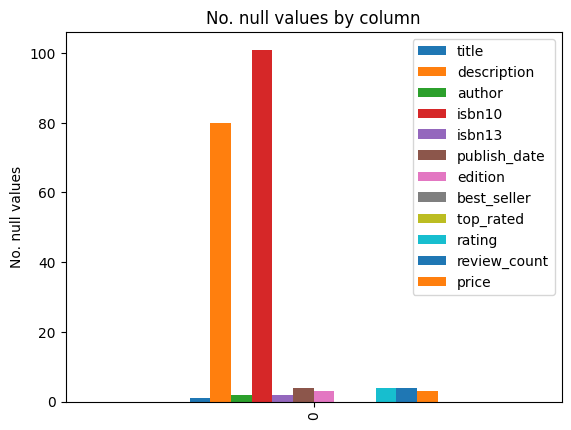

In [5]:
null_fig = null_count.plot(kind='bar')
null_fig.set_ylabel('No. null values')
null_fig.set_title('No. null values by column')

### Do you want to drop any column?

In [6]:
books.columns

Index(['title', 'description', 'author', 'isbn10', 'isbn13', 'publish_date',
       'edition', 'best_seller', 'top_rated ', 'rating', 'review_count',
       'price'],
      dtype='object')

In [7]:
to_drop = ['isbn10', 'isbn13']
df = books.drop(to_drop, axis=1)
df.head()

,title,description,author,publish_date,edition,best_seller,top_rated,rating,review_count,price
0,The Staff Engineer's Path,A Guide for Individual Contributors Navigating...,Tanya Reilly,2022-10-25,1,yes,no,"4,7",189.0,"31,99"
1,Cracking the Coding Interview,189 Programming Questions and Solutions,Gayle Laakmann McDowell,2015-07-01,6,yes,no,"4,7",8334.0,"33,21"
2,"Python Crash Course, 3rd Edition","A Hands-On, Project-Based Introduction to Prog...",Eric Matthes,2023-01-10,3,yes,no,"4,8",165.0,"30,61"
3,The Pragmatic Programmer,"20th Anniversary Edition, 2nd Edition: Your Jo...",David Thomas,2019-09-13,2,yes,no,"4,8",2521.0,38
4,Clean Code,A Handbook of Agile Software Craftsmanship,"Robert C, Martin",2008-08-01,1,yes,no,"4,7",5639.0,40


### Do you want to drop any rows with nulls?

In [8]:
df = df.dropna()
len(df.index)

381

In [9]:
df.dtypes

title            object
description      object
author           object
publish_date     object
edition          object
best_seller      object
top_rated        object
rating           object
review_count    float64
price            object
dtype: object

### Change price type to float
Requires chaning "," to "." for decimal point where necessary

In [10]:
df['price'] = df['price'].replace(to_replace=r'(\d*),(\d*)', value=r'\1.\2', regex=True)
df['price'].head()

0    31.99
1    33.21
2    30.61
3       38
4       40
Name: price, dtype: object

In [11]:
df = df.astype({'price': 'float'})

In [12]:
df.dtypes

title            object
description      object
author           object
publish_date     object
edition          object
best_seller      object
top_rated        object
rating           object
review_count    float64
price           float64
dtype: object

### Attept to change publish_date to datetime


In [13]:
# df['publish_date'] = pd.to_datetime(df['publish_date'])
# for date in df['publish_date']:
# for index, row in df.iterrows():
#     try:
#         new_date = pd.to_datetime(row['publish_date'])
#         df[index, 'publish_date'] = new_date
#     except ValueError:
#         df.drop(index)
#         continue

#### Attempt 2

In [14]:
df['publish_date'] = pd.to_datetime(df.publish_date, errors='coerce')
df = df.dropna()
print(len(df.index))
# df = df.astype({'publish_date':})
df.dtypes

360


title                   object
description             object
author                  object
publish_date    datetime64[ns]
edition                 object
best_seller             object
top_rated               object
rating                  object
review_count           float64
price                  float64
dtype: object

In [15]:
# df.dtypes

### Change edition to numeric
While also dropping any rows with values that can't be converted to numeric

In [16]:
df['edition'] = pd.to_numeric(df.edition, errors='coerce')
df = df.dropna()
print(len(df.index))
df = df.astype({'edition': 'int'})
df.dtypes

358


title                   object
description             object
author                  object
publish_date    datetime64[ns]
edition                  int32
best_seller             object
top_rated               object
rating                  object
review_count           float64
price                  float64
dtype: object

### Change rating to numeric

In [17]:
df['rating'] = pd.to_numeric(df.rating, errors='coerce')
df = df.dropna()
print(len(df.index))
df = df.astype({'edition': 'float'})
df.dtypes

35


title                   object
description             object
author                  object
publish_date    datetime64[ns]
edition                float64
best_seller             object
top_rated               object
rating                 float64
review_count           float64
price                  float64
dtype: object

### Cleaning bool fields

In [18]:
df.rename(columns={'top_rated ':'top_rated'}, inplace=True)
df['top_rated'].nunique()
# df['top_rated'].sample(20)

1

In [19]:
df.drop('top_rated', axis=1, inplace=True)
df.columns

Index(['title', 'description', 'author', 'publish_date', 'edition',
       'best_seller', 'rating', 'review_count', 'price'],
      dtype='object')

In [20]:
df['best_seller'].unique()

array(['yes', 'no'], dtype=object)

### Change yes/no to 1/0

In [33]:
df['best_seller'] = df['best_seller'].map({'yes':1, 'no':0})
# df.head()

In [22]:
import seaborn as sns

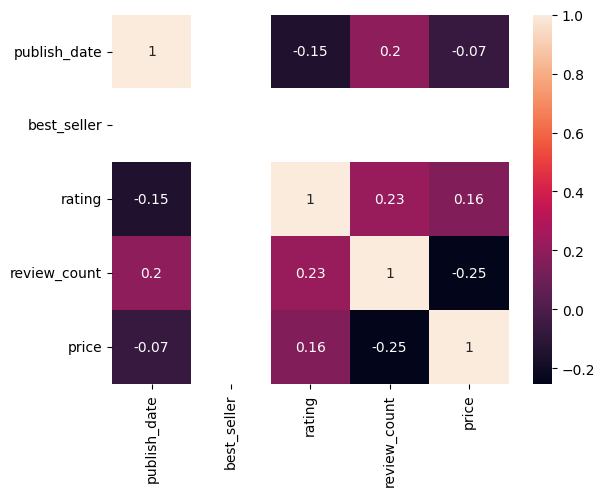

In [35]:
heat_df = df[['publish_date', 'best_seller', 'rating', 'review_count', 'price']]
heatplot = sns.heatmap(heat_df.corr(), annot=True)

### Get histograms to find out outliers

Text(0.5, 0.98, 'histograms')

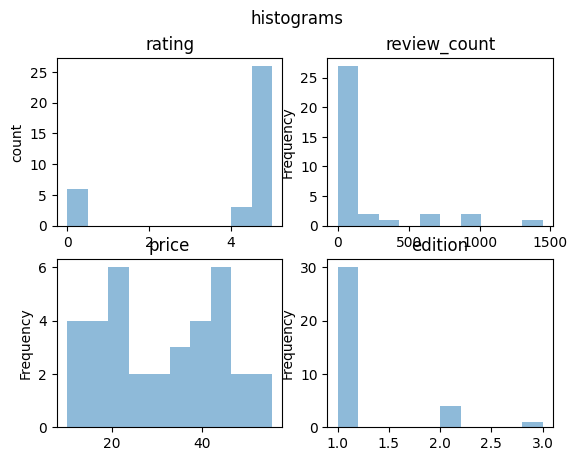

In [45]:
plt.subplot(2,2,1)
df['rating'].plot.hist(alpha=0.5)
plt.title('rating')
plt.ylabel('count')
plt.subplot(2,2,2)
df['review_count'].plot.hist(alpha=0.5)
plt.title('review_count')
plt.subplot(2,2,3)
df['price'].plot.hist(alpha=0.5)
plt.title('price')
plt.subplot(2,2,4)
df['edition'].plot.hist(alpha=0.5)
plt.title('edition')
plt.suptitle('histograms')


### Count of books by year

<Axes: xlabel='publish_date'>

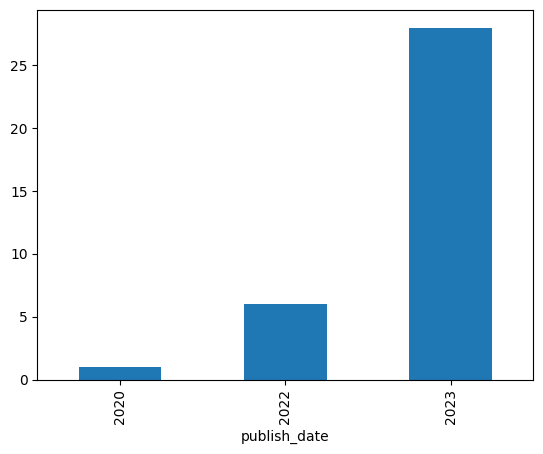

In [49]:
df['publish_date'].groupby(df['publish_date'].dt.year).count().plot(kind="bar")

### By author

<Axes: xlabel='author'>

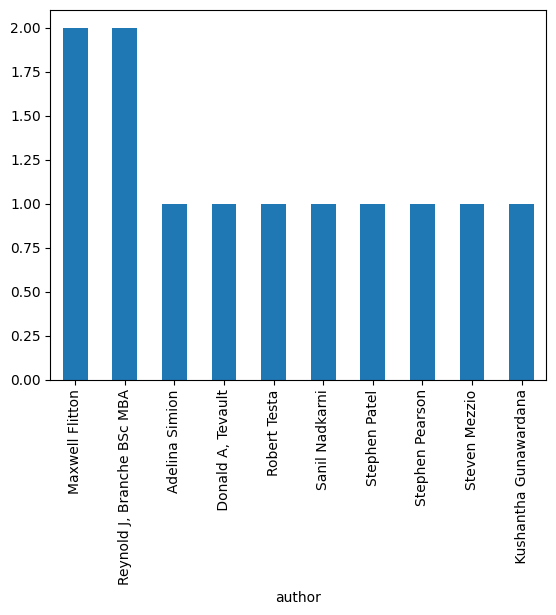

In [53]:
df['author'].groupby(df['author']).count().sort_values(ascending=False)[:10].plot(kind="bar")

### Most common words in descripton column

<Axes: >

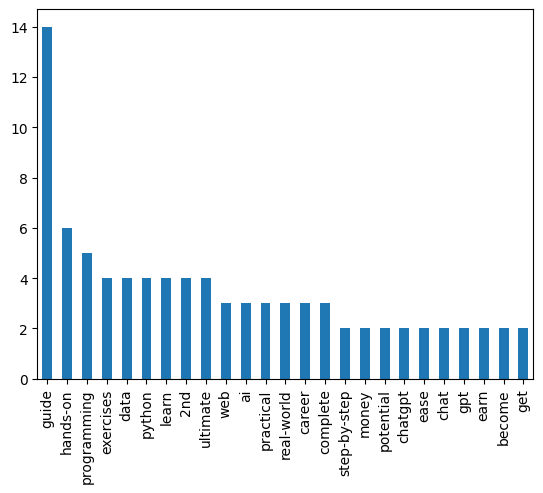

In [61]:
word_counts = pd.Series(' '.join(df['description']).lower().split()).value_counts()[:100]
word_counts
word_counts_clean = word_counts.drop(labels=['and', 'the', 'to', 'a', 'with', 'in', 'your', 'for', 'of', 'from', 'edition'])
# word_counts_clean[:25]
word_counts_clean[:25].plot.bar()

### Word clouds

In [62]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [1]:
desc_string=' '.join(df['description'].str.lower())
plt.figure(figsize=(20,10))
wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50)
wc.generate(desc_string)
plt.imshow(wc)
plt.axis('off')
plt.title('Description word cloud')

NameError: name 'df' is not defined

Text(0.5, 1.0, 'Title word cloud')

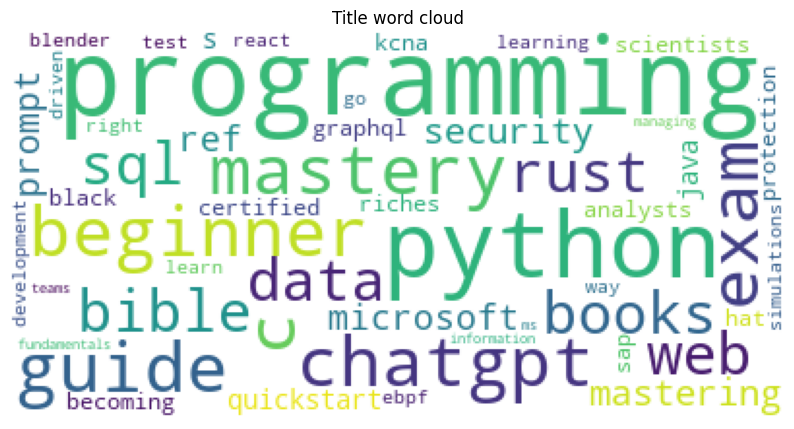

In [67]:
title_string=' '.join(df['title'].str.lower())
plt.figure(figsize=(10,10))
wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50)
wc.generate(title_string)
plt.imshow(wc)
plt.axis('off')
plt.title('Title word cloud')

### Scatter plots?


Text(0.5, 1.0, 'price / rating')

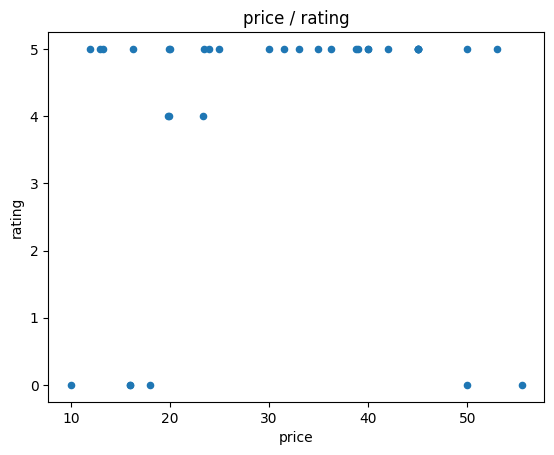

In [72]:
price_rating = df.plot.scatter(x='price', y='rating')
price_rating.set_title('price / rating')

Text(0.5, 1.0, 'price / review_count')

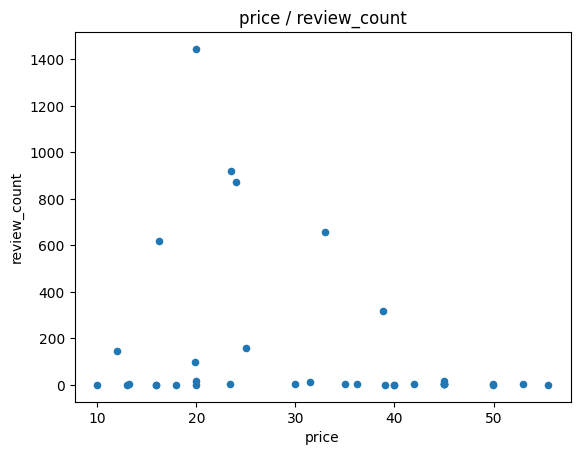

In [73]:
price_review = df.plot.scatter(x='price', y='review_count')
price_review.set_title('price / review_count')